<h1>Historical Stock and Revenue Data Analysis</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. 

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Defining a Function that Makes a Graph</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract Tesla Revenue Data</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract GME Revenue Data</li>
        <li>Plotting Tesla Stock Graph</li>
        <li>Plotting GameStop Stock Graph</li>
    </ul>
</div>

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

## Define Graphing Function


In this section, we define the function `make_graph`. 

In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [10]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Setting the `period` parameter to `max` so we get information for the maximum amount of time.


In [12]:
tesla_data = tesla.history(period="max")

**Reseting the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and displaying the first five rows of the `tesla_data` dataframe using the `head` function.

In [14]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Using Webscraping to Extract Tesla Revenue Data


Using the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

In [17]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

Parsing the html data using `beautiful_soup`.


In [19]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with `Tesla Quarterly Revenue` and storing it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [21]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {"class": "historical_data_table table"})
    headers = [header.text for header in table.find_all('th')]
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]: 
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    print(tesla_revenue.head())
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")


   Date  Revenue
0  2023    96773
1  2022    81462
2  2021    53823
3  2020    31536
4  2019    24578


<details><summary>Click here if you need help removing the dollar sign and comma</summary>

```
    
If you parsed the HTML table by row and column you can use the replace function on the string
    
    revenue = col[1].text.replace("$", "").replace(",", "")
    
If you use the read_html function you can use the replace function on the string representation of the column

    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

```

</details>


Removing the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire `tesla_revenue` DataFrame to see if you have any.

In [24]:
tesla_revenue

,Date,Revenue
0,2023,96773
1,2022,81462
2,2021,53823
3,2020,31536
4,2019,24578
5,2018,21461
6,2017,11759
7,2016,7000
8,2015,4046
9,2014,3198


<details><summary>Click here if you need help removing the Nan or empty strings</summary>

```
    
If you have NaN in the Revenue column
    
    tesla_revenue.dropna(inplace=True)
    
If you have emtpty string in the Revenue column

    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

```

</details>


Displaing the last 5 row of the `tesla_revenue` dataframe using the `tail` function.

In [27]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
10,2013,2013
11,2012,413
12,2011,204
13,2010,117
14,2009,112


## Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [30]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Setting the `period` parameter to `max` so we get information for the maximum amount of time.


In [32]:
gme_data=gamestop.history(period="max")

**Resetting the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function.

In [34]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Using Webscraping to Extract GME Revenue Data

Using the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

In [37]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

Parsing the html data using `beautiful_soup`.


In [39]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [41]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {"class": "historical_data_table table"})
    headers = [header.text for header in table.find_all('th')]
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]: 
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '', regex=False)
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    print(gme_revenue.head())
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")


   Date  Revenue
0  2024     5273
1  2023     5927
2  2022     6011
3  2021     5090
4  2020     6466


Displaying the last five rows of the `gme_revenue` dataframe using the `tail` function.

In [43]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
11,2013,8887
12,2012,9551
13,2011,9474
14,2010,9078
15,2009,8806


## Plotting Tesla Stock Graph


Using the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`

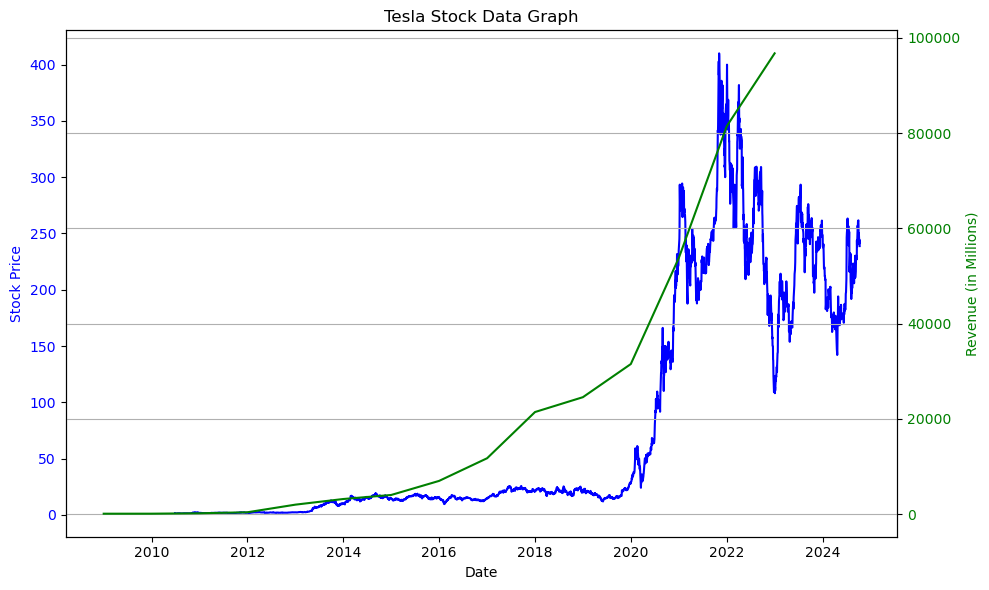

In [46]:
def make_graph(tesla_data, tesla_revenue, title):
    tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(tesla_data['Date'], tesla_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (in Millions)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title(title)
    fig.tight_layout()
    plt.grid()
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')


## Plotting GameStop Stock Graph


Using the `make_graph` function to graph the GameStop Stock Data. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`.

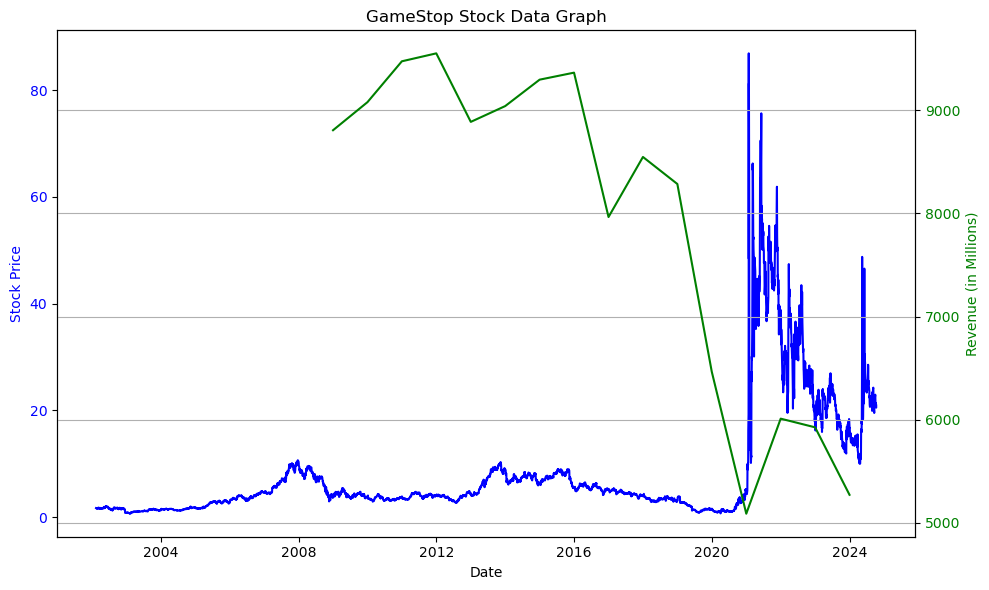

In [49]:
def make_graph(stock_data, revenue_data, title):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (in Millions)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title(title)
    fig.tight_layout()
    plt.grid()
    plt.show()
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')


<h2>About the Author:</h2> 

<a href="https://www.linkedin.com/in/jaiswalchitransh/">Chitransh Jaiswal</a>


## <h3 align="center">Copyright © Chitransh Jaiswal 2024. All rights reserved. <h3/>